In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df=pd.read_csv("zomato.csv",encoding="unicode_escape")
df1=pd.read_excel("Country-Code.xlsx")
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [13]:
df1

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [14]:
df = pd.merge(df, df1, on='Country Code')

In [15]:
df.shape

(9551, 22)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [6]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [17]:
df.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In [18]:
df["Cuisines"].fillna(df["Cuisines"].mode()[0],inplace=True)

In [19]:
df.apply(lambda x:x.nunique())

Restaurant ID           9551
Restaurant Name         7446
Country Code              15
City                     141
Address                 8918
Locality                1208
Locality Verbose        1265
Longitude               8120
Latitude                8677
Cuisines                1825
Average Cost for two     140
Currency                  12
Has Table booking          2
Has Online delivery        2
Is delivering now          2
Switch to order menu       1
Price range                4
Aggregate rating          33
Rating color               6
Rating text                6
Votes                   1012
Country                   15
dtype: int64

In [22]:
df["Country"].value_counts()

India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: Country, dtype: int64

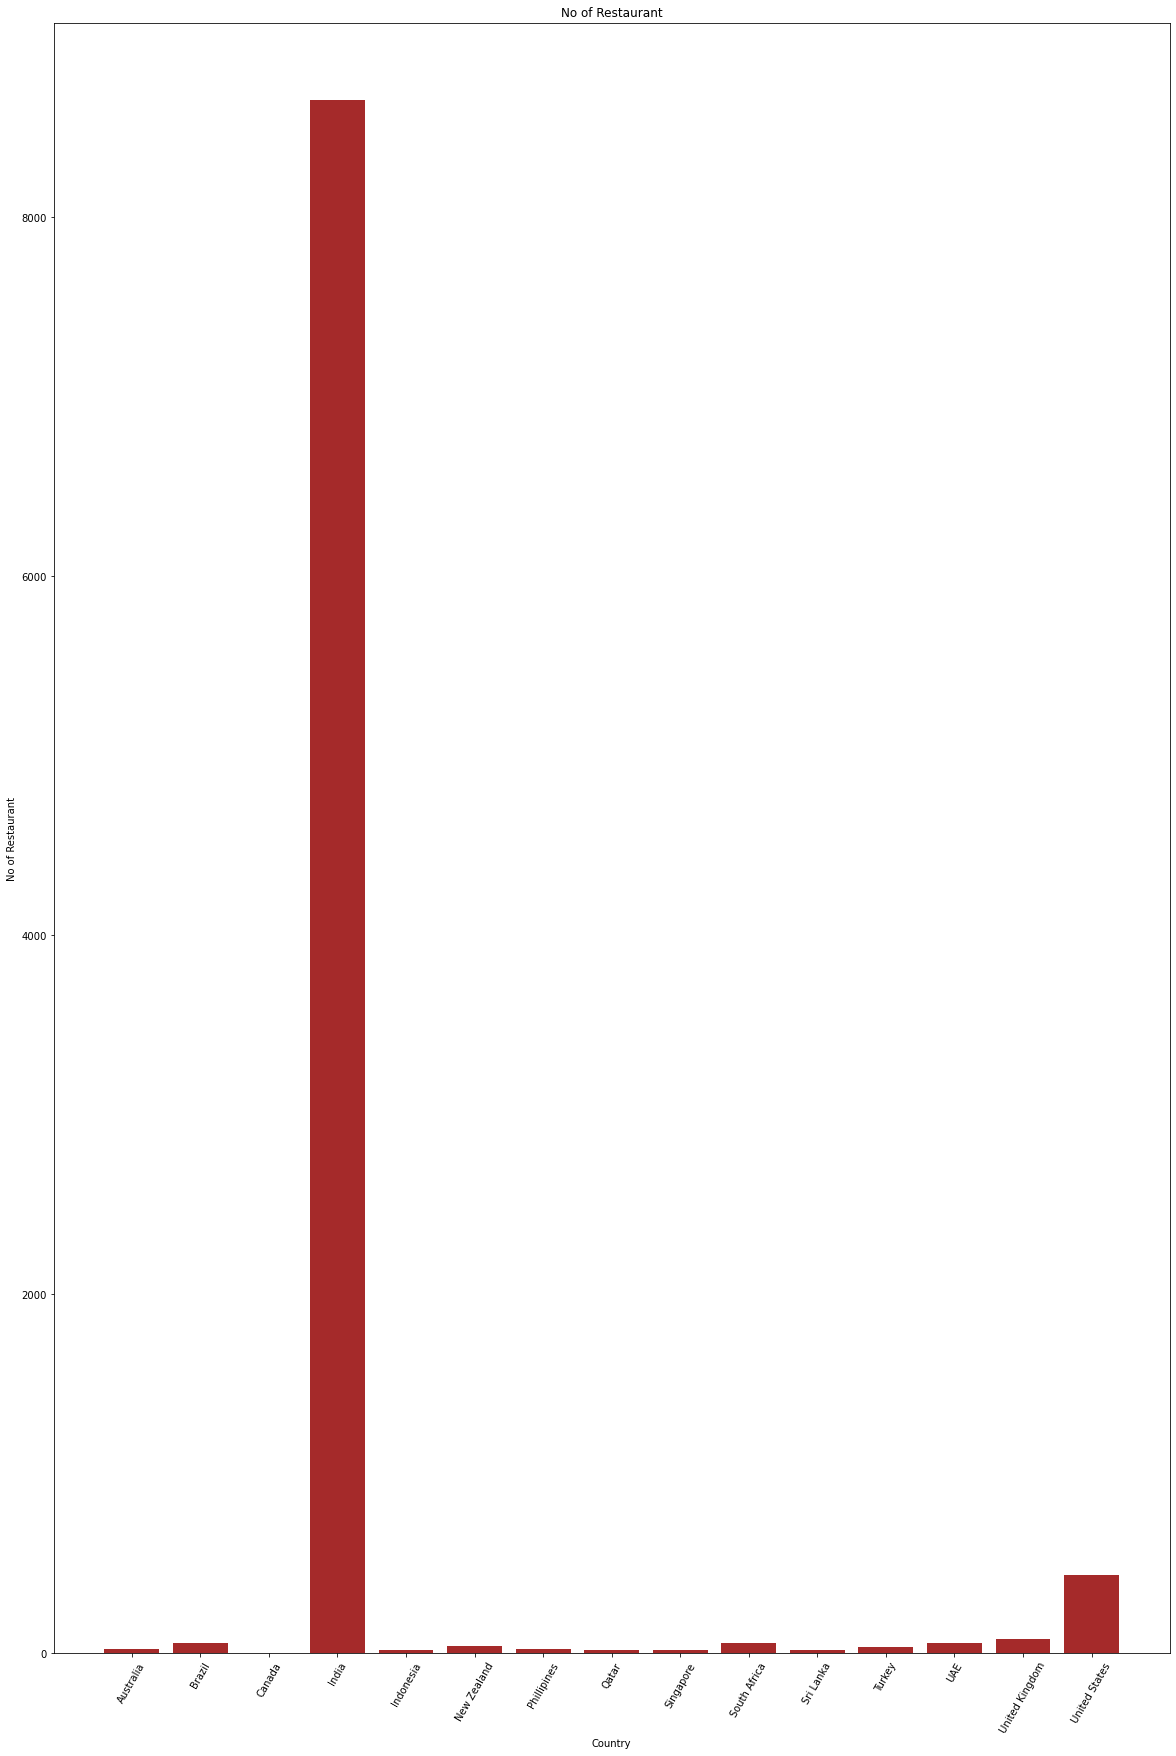

In [30]:
data_country = df.groupby(['Country'], as_index=False).count()[['Country', 'Restaurant ID']]
data_country.columns = ['Country', 'No of Restaurant']
plt.figure(figsize=(20,30))
plt.bar(data_country['Country'], data_country['No of Restaurant'],color="brown")
plt.xlabel('Country')
plt.ylabel('No of Restaurant')
plt.title('No of Restaurant')
plt.xticks(rotation = 60);

In [31]:
df["City"].value_counts()

New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
                ... 
Huskisson          1
Panchkula          1
Forrest            1
Flaxton            1
Chatham-Kent       1
Name: City, Length: 141, dtype: int64

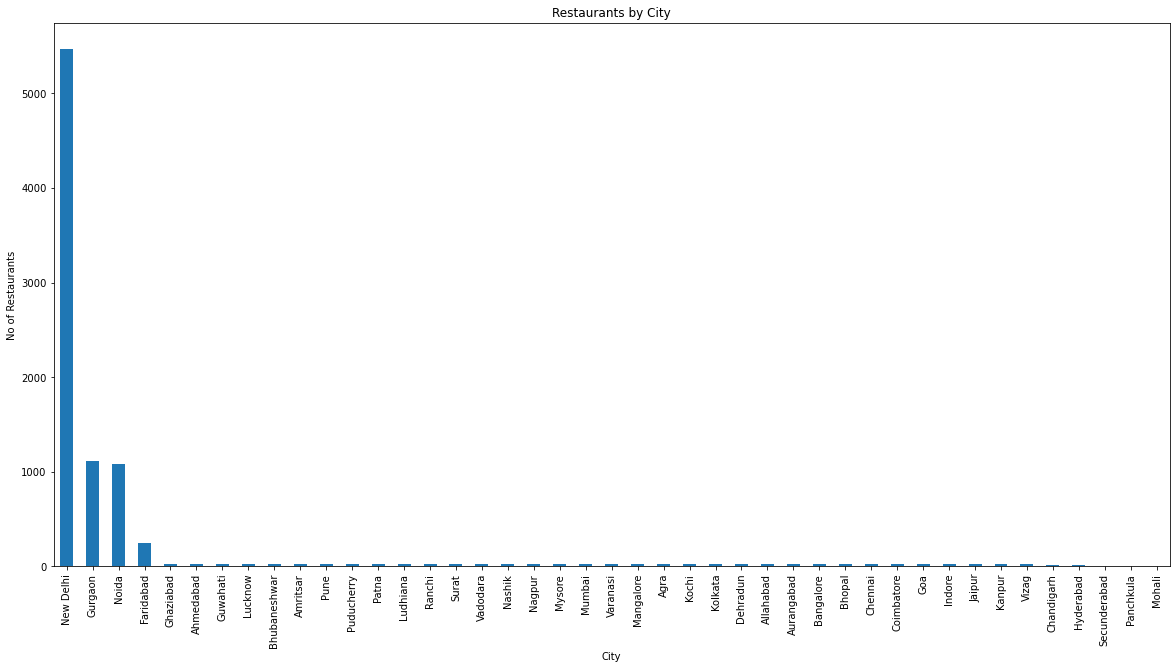

In [32]:
data_City = df[df['Country'] =='India']
Total_city =data_City['City'].value_counts()
Total_city.plot.bar(figsize=(20,10))
plt.title('Restaurants by City')                                             
plt.xlabel('City')
plt.ylabel('No of Restaurants')
plt.show()